In [1]:
import pandas as pd
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [31]:
pd.set_option("display.max_rows", 250)

In [ ]:
df_meetings = pd.read_csv("./data/gold/panel_data_meetings_Ym_v020701.csv")
del df_meetings["Y-w"]
df_meetings.set_index(["member_id", "Y-m"], inplace=True)


df_meps = pd.read_csv("./data/gold/panel_data_meps_Ym_v020702.csv")
del df_meps["Y-w"]
df_meps.set_index(["member_id", "Y-m"], inplace=True)


df_questions = pd.read_csv("./data/gold/panel_data_questions_Ym_v020703.csv")
del df_questions["Y-w"]
df_questions.rename(columns={"creator": "member_id"}, inplace=True)
df_questions.set_index(["member_id", "Y-m"], inplace=True)

In [20]:
df_questions.describe().T

,count,mean,std,min,25%,50%,75%,max
infered_topic_agriculture,44318.0,0.295275,0.786275,0.0,0.0,0.0,0.0,36.0
infered_topic_economics and trade,44318.0,0.705763,1.166732,0.0,0.0,0.0,1.0,42.0
infered_topic_education,44318.0,0.134280,0.443273,0.0,0.0,0.0,0.0,30.0
infered_topic_environment and climate,44318.0,0.630037,1.071155,0.0,0.0,0.0,1.0,23.0
infered_topic_foreign and security affairs,44318.0,0.590482,1.042399,0.0,0.0,0.0,1.0,30.0
infered_topic_health,44318.0,0.866962,1.240962,0.0,0.0,1.0,1.0,21.0
infered_topic_human rights,44318.0,1.219482,1.557367,0.0,0.0,1.0,2.0,42.0
infered_topic_infrastructure and industry,44318.0,0.441626,0.809165,0.0,0.0,0.0,1.0,17.0
infered_topic_technology,44318.0,0.400875,0.764065,0.0,0.0,0.0,1.0,18.0


In [24]:
df_meps.describe().T

,count,mean,std,min,25%,50%,75%,max
- MEMBER_PARLIAMENT,175890.0,0.415532,0.492815,0.0,0.0,0.0,1.0,1.0
EU_POLITICAL_GROUP - MEMBER,175890.0,0.362846,0.480822,0.0,0.0,0.0,1.0,1.0
NATIONAL_CHAMBER - MEMBER,175890.0,0.415009,0.492725,0.0,0.0,0.0,1.0,1.0
EU_INSTITUTION - MEMBER,175890.0,0.406026,0.491091,0.0,0.0,0.0,1.0,1.0
DELEGATION_PARLIAMENTARY_ASSEMBLY - MEMBER_SUBSTITUTE,175890.0,0.105793,0.307574,0.0,0.0,0.0,0.0,1.0
COMMITTEE_PARLIAMENTARY_STANDING - MEMBER_SUBSTITUTE,175890.0,0.370590,0.482964,0.0,0.0,0.0,1.0,1.0
DELEGATION_JOINT_COMMITTEE - MEMBER,175890.0,0.057155,0.232139,0.0,0.0,0.0,0.0,1.0
COMMITTEE_PARLIAMENTARY_STANDING - MEMBER,175890.0,0.373637,0.483770,0.0,0.0,0.0,1.0,1.0
WORKING_GROUP - MEMBER,175890.0,0.147149,0.354255,0.0,0.0,0.0,0.0,1.0
DELEGATION_PARLIAMENTARY - MEMBER,175890.0,0.249662,0.432818,0.0,0.0,0.0,0.0,1.0


In [21]:
df_meetings.describe().T

,count,mean,std,min,25%,50%,75%,max
l_agriculture,10811.0,1.506521,2.631628,0.0,0.0,1.0,2.0,63.0
l_economics_and_trade,10811.0,3.230876,4.491906,0.0,1.0,2.0,4.0,153.0
l_education,10811.0,1.736750,2.660375,0.0,0.0,1.0,2.0,81.0
l_environment_and_climate,10811.0,2.977338,4.314674,0.0,1.0,2.0,4.0,134.0
l_foreign_and_security_affairs,10811.0,2.606142,3.785470,0.0,1.0,2.0,3.0,145.0
l_health,10811.0,2.219499,3.407753,0.0,1.0,1.0,3.0,121.0
l_human_rights,10811.0,1.599575,2.614015,0.0,0.0,1.0,2.0,96.0
l_infrastructure_and_industry,10811.0,3.048469,4.458780,0.0,1.0,2.0,4.0,145.0
l_technology,10811.0,2.980020,4.261586,0.0,1.0,2.0,4.0,147.0
member_capacity_Committee chair,10811.0,0.077144,0.572388,0.0,0.0,0.0,0.0,23.0


In [39]:
# Add prefixes to columns
df_questions_prefixed = df_questions.add_prefix("questions_")
df_meps_prefixed = df_meps.add_prefix("meps_")
df_meetings_prefixed = df_meetings.add_prefix("meetings_")


df = df_questions_prefixed.join(
    df_meps_prefixed, on=["member_id", "Y-m"], how="inner"
).join(df_meetings_prefixed, on=["member_id", "Y-m"], how="inner")


df.describe().T

,count,mean,std,min,25%,50%,75%,max
questions_infered_topic_agriculture,4121.0,0.244116,0.551789,0.0,0.0,0.0,0.0,6.0
questions_infered_topic_economics and trade,4121.0,0.502548,0.761677,0.0,0.0,0.0,1.0,6.0
questions_infered_topic_education,4121.0,0.127639,0.383159,0.0,0.0,0.0,0.0,3.0
questions_infered_topic_environment and climate,4121.0,0.661247,0.997461,0.0,0.0,0.0,1.0,12.0
questions_infered_topic_foreign and security affairs,4121.0,0.502791,0.806860,0.0,0.0,0.0,1.0,7.0
questions_infered_topic_health,4121.0,0.859015,1.105710,0.0,0.0,1.0,1.0,10.0
questions_infered_topic_human rights,4121.0,1.086872,1.229581,0.0,0.0,1.0,1.0,10.0
questions_infered_topic_infrastructure and industry,4121.0,0.429993,0.703330,0.0,0.0,0.0,1.0,6.0
questions_infered_topic_technology,4121.0,0.409609,0.708920,0.0,0.0,0.0,1.0,6.0
meps_ - MEMBER_PARLIAMENT,4121.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [40]:
# Find and remove highly correlated features
def remove_collinear_features(X, threshold=0.95):
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print("to_drop", to_drop)
    return X.drop(to_drop, axis=1)


def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X.values, i) for i in range(X.shape[1])
    ]
    return vif_data

# Descritivas

## Time series

                 questions_total  meetings_total
questions_total         1.000000        0.646874
meetings_total          0.646874        1.000000


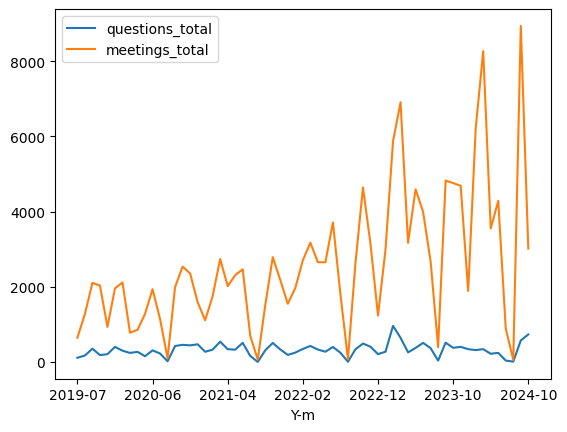

In [232]:
df_g = df.groupby("Y-m").sum()

df_g["questions_total"] = df_g[[c for c in df_g.columns if "questions" in c]].sum(
    axis=1
)
df_g["meetings_total"] = df_g[[c for c in df_g.columns if "meetings" in c]].sum(axis=1)

df_g[["questions_total", "meetings_total"]].plot()

print(df_g[['questions_total', 'meetings_total']].corr())

                 questions_total  meetings_total
questions_total          1.00000         0.71073
meetings_total           0.71073         1.00000


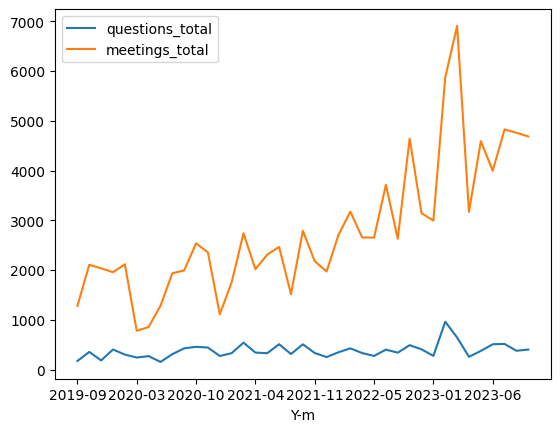

In [233]:
df_g_no_seasonal_variations = df_g[
    ~df_g.index.str.contains("07")
    & ~df_g.index.str.contains("12")
    & ~df_g.index.str.contains("08")
    & ~df_g.index.str.contains("2024")
]

df_g_no_seasonal_variations[['questions_total', 'meetings_total']].plot()
print(df_g_no_seasonal_variations[['questions_total', 'meetings_total']].corr())

# INferencia

# Naive G

['questions_infered_topic_agriculture',
 'questions_infered_topic_economics and trade',
 'questions_infered_topic_education',
 'questions_infered_topic_environment and climate',
 'questions_infered_topic_foreign and security affairs',
 'questions_infered_topic_health',
 'questions_infered_topic_human rights',
 'questions_infered_topic_infrastructure and industry',
 'questions_infered_topic_technology']

In [253]:
import statsmodels.api as sm

df_ = df_g_no_seasonal_variations.dropna()

for y in [c for c in df.columns if "infered_topic" in c]:
    print(y)
    model = sm.OLS(
        df_[y],
        df_[
            [
                c
                for c in df_.columns
                if "meetings" in c
                and "head_office" not in c
                and c != "meetings_total"
                and "member_capacity" not in c
            ]
        ],
    )
    res = model.fit()

    print(res.summary())
    print('\n\n', "*=*" * 40)


questions_infered_topic_agriculture
                                         OLS Regression Results                                         
Dep. Variable:     questions_infered_topic_agriculture   R-squared (uncentered):                   0.904
Model:                                             OLS   Adj. R-squared (uncentered):              0.836
Method:                                  Least Squares   F-statistic:                              13.47
Date:                                 Mon, 21 Jul 2025   Prob (F-statistic):                    4.37e-08
Time:                                         21:44:59   Log-Likelihood:                         -128.43
No. Observations:                                   39   AIC:                                      288.9
Df Residuals:                                       23   BIC:                                      315.5
Df Model:                                           16                                                  
Covariance Type:   

### PAnel

In [ ]:
columns = df.columns

for c in columns:
    print(c)

In [42]:
y_column = "questions_infered_topic_agriculture"
x_columns = [
    c
    for c in df.columns
    if "question" not in c and c not in ["date", "date_yyyy_mm", "member_id"]
]

In [44]:
Y = df[y_column]
X = df[x_columns]
X = sm.add_constant(X)
model = sm.OLS(Y, X)

results = model.fit()

print(results.summary())

                                     OLS Regression Results                                    
Dep. Variable:     questions_infered_topic_agriculture   R-squared:                       0.140
Model:                                             OLS   Adj. R-squared:                  0.101
Method:                                  Least Squares   F-statistic:                     3.634
Date:                                 Mon, 21 Jul 2025   Prob (F-statistic):           1.49e-48
Time:                                         18:39:26   Log-Likelihood:                -3087.0
No. Observations:                                 4121   AIC:                             6528.
Df Residuals:                                     3944   BIC:                             7647.
Df Model:                                          176                                         
Covariance Type:                             nonrobust                                         
                                        

In [ ]:
# Prepare panel data
from linearmodels import PanelOLS


print("Preparing panel data...")
df_panel = df.copy().reset_index()

# Ensure 'Y-m' is date-like
if not pd.api.types.is_datetime64_any_dtype(df_panel["Y-m"]):
    df_panel["Y-m"] = pd.to_datetime(df_panel["Y-m"], format="%Y-%m")

# Set MultiIndex for panel data
df_panel = df_panel.set_index(["member_id", "Y-m"])

df_panel.dropna(inplace=True)
print(f"Panel data shape after dropna: {df_panel.shape}")

Y_panel = df_panel[y_column]
X_panel = df_panel[x_columns]

print(f"Y_panel shape: {Y_panel.shape}")
print(f"X_panel shape: {X_panel.shape}")

# Remove any constant columns that might already exist
X_panel = X_panel.loc[:, ~(X_panel == X_panel.iloc[0]).all()]

# Add constant
X = sm.add_constant(X_panel)

# Ensure no perfect collinearity
print("X shape:", X.shape)
print("Y shape:", Y_panel.shape)
print("Any NaN values in X:", X.isna().any().any())
print("Any NaN values in Y:", Y_panel.isna().any())

model = PanelOLS(
    dependent=Y_panel,
    exog=X,
    entity_effects=True,
    check_rank=False,
    drop_absorbed=True,
)
results_fe = model.fit()
print("\nPanelOLS Results:")
print(results_fe)

# Tentar diferentes especificações

Remover colunas de meps_

In [156]:
columns_to_agg = {
    "meps_COMMITTEE_PARLIAMENTARY_SPECIAL - CHAIR": "meps_COMMITTEE_PARLIAMENTARY_CHAIR",
    "meps_COMMITTEE_PARLIAMENTARY_SPECIAL - CHAIR_VICE": "meps_COMMITTEE_PARLIAMENTARY",
    "meps_COMMITTEE_PARLIAMENTARY_SPECIAL - MEMBER": "meps_COMMITTEE_PARLIAMENTARY",
    "meps_COMMITTEE_PARLIAMENTARY_SPECIAL - MEMBER_SUBSTITUTE": "meps_COMMITTEE_PARLIAMENTARY",
    "meps_COMMITTEE_PARLIAMENTARY_STANDING - CHAIR": "meps_COMMITTEE_PARLIAMENTARY_CHAIR",
    "meps_COMMITTEE_PARLIAMENTARY_STANDING - CHAIR_VICE": "meps_COMMITTEE_PARLIAMENTARY",
    "meps_COMMITTEE_PARLIAMENTARY_STANDING - MEMBER": "meps_COMMITTEE_PARLIAMENTARY",
    "meps_COMMITTEE_PARLIAMENTARY_STANDING - MEMBER_SUBSTITUTE": "meps_COMMITTEE_PARLIAMENTARY",
    "meps_COMMITTEE_PARLIAMENTARY_SUB - CHAIR": "meps_COMMITTEE_PARLIAMENTARY_CHAIR",
    "meps_COMMITTEE_PARLIAMENTARY_SUB - CHAIR_VICE": "meps_COMMITTEE_PARLIAMENTARY",
    "meps_COMMITTEE_PARLIAMENTARY_SUB - MEMBER": "meps_COMMITTEE_PARLIAMENTARY",
    "meps_COMMITTEE_PARLIAMENTARY_SUB - MEMBER_SUBSTITUTE": "meps_COMMITTEE_PARLIAMENTARY",
    "meps_COMMITTEE_PARLIAMENTARY_TEMPORARY - CHAIR": "meps_COMMITTEE_PARLIAMENTARY_CHAIR",
    "meps_COMMITTEE_PARLIAMENTARY_TEMPORARY - CHAIR_VICE": "meps_COMMITTEE_PARLIAMENTARY",
    "meps_COMMITTEE_PARLIAMENTARY_TEMPORARY - MEMBER": "meps_COMMITTEE_PARLIAMENTARY",
    "meps_COMMITTEE_PARLIAMENTARY_TEMPORARY - MEMBER_SUBSTITUTE": "meps_COMMITTEE_PARLIAMENTARY",
    "meps_DELEGATION_JOINT_COMMITTEE - CHAIR": "meps_DELEGATION_CHAIR",
    "meps_DELEGATION_JOINT_COMMITTEE - CHAIR_VICE": "meps_DELEGATION",
    "meps_DELEGATION_JOINT_COMMITTEE - MEMBER": "meps_DELEGATION",
    "meps_DELEGATION_JOINT_COMMITTEE - MEMBER_SUBSTITUTE": "meps_DELEGATION",
    "meps_DELEGATION_PARLIAMENTARY - CHAIR": "meps_DELEGATION_CHAIR",
    "meps_DELEGATION_PARLIAMENTARY - CHAIR_VICE": "meps_DELEGATION",
    "meps_DELEGATION_PARLIAMENTARY - MEMBER": "meps_DELEGATION",
    "meps_DELEGATION_PARLIAMENTARY - MEMBER_SUBSTITUTE": "meps_DELEGATION",
    "meps_DELEGATION_PARLIAMENTARY - PRESIDENT_VICE_SECOND": "meps_DELEGATION",
    "meps_DELEGATION_PARLIAMENTARY_ASSEMBLY - CHAIR": "meps_DELEGATION_CHAIR",
    "meps_DELEGATION_PARLIAMENTARY_ASSEMBLY - CHAIR_VICE": "meps_DELEGATION",
    "meps_DELEGATION_PARLIAMENTARY_ASSEMBLY - MEMBER": "meps_DELEGATION",
    "meps_DELEGATION_PARLIAMENTARY_ASSEMBLY - MEMBER_SUBSTITUTE": "meps_DELEGATION",
    "meps_WORKING_GROUP - ": "meps_WORKING_GROUP",
    "meps_WORKING_GROUP - CHAIR": "meps_WORKING_GROUP_CHAIR",
    "meps_WORKING_GROUP - CHAIR_CO": "meps_WORKING_GROUP",
    "meps_WORKING_GROUP - CHAIR_VICE": "meps_WORKING_GROUP",
    "meps_WORKING_GROUP - MEMBER": "meps_WORKING_GROUP",
    "meps_WORKING_GROUP - MEMBER_BUREAU": "meps_WORKING_GROUP",
    "meps_WORKING_GROUP - PRESIDENT_PARLIAMENT_STOA": "meps_WORKING_GROUP",
    # "meps_EU_POLITICAL_GROUP - ": "meps_EU_POLITICAL_GROUP",
    "meps_EU_POLITICAL_GROUP - CHAIR": "meps_EU_POLITICAL_GROUP_CHAIR",
    # "meps_EU_POLITICAL_GROUP - CHAIR_BUREAU": "meps_EU_POLITICAL_GROUP",
    # "meps_EU_POLITICAL_GROUP - CHAIR_CO": "meps_EU_POLITICAL_GROUP",
    # "meps_EU_POLITICAL_GROUP - CHAIR_VICE": "meps_EU_POLITICAL_GROUP",
    # "meps_EU_POLITICAL_GROUP - CHAIR_VICE_FIRST": "meps_EU_POLITICAL_GROUP",
    # "meps_EU_POLITICAL_GROUP - MEMBER": "meps_EU_POLITICAL_GROUP",
    # "meps_EU_POLITICAL_GROUP - MEMBER_BUREAU": "meps_EU_POLITICAL_GROUP",
    # "meps_EU_POLITICAL_GROUP - PRESIDENT_CO": "meps_EU_POLITICAL_GROUP",
    # "meps_EU_POLITICAL_GROUP - PRESIDENT_VICE": "meps_EU_POLITICAL_GROUP",
    "meps_EU_POLITICAL_GROUP - TREASURER": "meps_EU_POLITICAL_GROUP_TREASURER",
    # "meps_EU_POLITICAL_GROUP - TREASURER_CO": "meps_EU_POLITICAL_GROUP",
    # "meps_EU_POLITICAL_GROUP - TREASURER_DEPUTY": "meps_EU_POLITICAL_GROUP",
    # "meps_NATIONAL_CHAMBER - CHAIR": "meps_NATIONAL_CHAMBER_CHAIR",
    # "meps_NATIONAL_CHAMBER - MEMBER": "meps_NATIONAL_CHAMBER",
    # "meps_NATIONAL_CHAMBER - PRESIDENT_VICE": "meps_NATIONAL_CHAMBER",
    # "meps_NATIONAL_CHAMBER - TREASURER_CO": "meps_NATIONAL_CHAMBER",
}


df_cleaned = df.copy()
for k, v in columns_to_agg.items():
    if v in df_cleaned.columns:
        df_cleaned[v] = df_cleaned[v] + df_cleaned[k]
    else:
        df_cleaned[v] = df_cleaned[k]
    df_cleaned.drop(k, axis=1, inplace=True)

for c in df_cleaned.columns.sort_values():
    if "meps_" not in c or "COUNTRY" in c:
        continue
    if c not in columns_to_agg.values():
        df_cleaned.drop(c, axis=1, inplace=True)


df_cleaned.dropna(inplace=True)


df_cleaned.rename(
    columns={c: c.replace(" ", "_") for c in df_cleaned.columns},
    inplace=True,
)

In [157]:
x_columns = [c for c in df_cleaned.columns if "questions" not in c]

Y = df_cleaned[y_column]
X = df_cleaned[x_columns]
X = sm.add_constant(X)

model = sm.OLS(Y, X)

results = model.fit()

print(results.summary())

                                     OLS Regression Results                                    
Dep. Variable:     questions_infered_topic_agriculture   R-squared:                       0.067
Model:                                             OLS   Adj. R-squared:                  0.039
Method:                                  Least Squares   F-statistic:                     2.447
Date:                                 Mon, 21 Jul 2025   Prob (F-statistic):           1.88e-15
Time:                                         19:42:22   Log-Likelihood:                -3254.3
No. Observations:                                 4121   AIC:                             6745.
Df Residuals:                                     4003   BIC:                             7491.
Df Model:                                          117                                         
Covariance Type:                             nonrobust                                         
                                        

Criar formula com interações entre país do mep e país do lobista

In [ ]:
formula = f"{y_column} ~ "

interaction_formula = (
    "meps_COUNTRY_AUT * meetings_l_head_office_country_AUSTRIA + "
    "meps_COUNTRY_BEL * meetings_l_head_office_country_BELGIUM + "
    "meps_COUNTRY_BGR * meetings_l_head_office_country_BULGARIA + "
    "meps_COUNTRY_CYP * meetings_l_head_office_country_CYPRUS + "
    "meps_COUNTRY_CZE * meetings_l_head_office_country_CZECH_REPUBLIC + "
    "meps_COUNTRY_DEU * meetings_l_head_office_country_GERMANY + "
    "meps_COUNTRY_DNK * meetings_l_head_office_country_DENMARK + "
    "meps_COUNTRY_ESP * meetings_l_head_office_country_SPAIN + "
    "meps_COUNTRY_EST * meetings_l_head_office_country_ESTONIA + "
    "meps_COUNTRY_FIN * meetings_l_head_office_country_FINLAND + "
    "meps_COUNTRY_FRA * meetings_l_head_office_country_FRANCE + "
    "meps_COUNTRY_GBR * meetings_l_head_office_country_UNITED_KINGDOM + "
    "meps_COUNTRY_GRC * meetings_l_head_office_country_GREECE + "
    "meps_COUNTRY_HRV * meetings_l_head_office_country_CROATIA + "
    "meps_COUNTRY_HUN * meetings_l_head_office_country_HUNGARY + "
    "meps_COUNTRY_IRL * meetings_l_head_office_country_IRELAND + "
    "meps_COUNTRY_ITA * meetings_l_head_office_country_ITALY + "
    "meps_COUNTRY_LTU * meetings_l_head_office_country_LITHUANIA + "
    "meps_COUNTRY_LUX * meetings_l_head_office_country_LUXEMBOURG + "
    "meps_COUNTRY_LVA * meetings_l_head_office_country_LATVIA + "
    "meps_COUNTRY_MLT * meetings_l_head_office_country_MALTA + "
    "meps_COUNTRY_NLD * meetings_l_head_office_country_NETHERLANDS + "
    "meps_COUNTRY_POL * meetings_l_head_office_country_POLAND + "
    "meps_COUNTRY_PRT * meetings_l_head_office_country_PORTUGAL + "
    "meps_COUNTRY_ROU * meetings_l_head_office_country_ROMANIA + "
    "meps_COUNTRY_SVK * meetings_l_head_office_country_SLOVAKIA + "
    "meps_COUNTRY_SVN * meetings_l_head_office_country_SLOVENIA + "
    "meps_COUNTRY_SWE * meetings_l_head_office_country_SWEDEN + "
    f"{' + '.join([c for c in df_cleaned.columns if 'head_office' not in c and 'meetings_' in c])} "
)
import statsmodels.formula.api as smf


# df_cleaned['const'] = 1

model = smf.ols(formula=formula + interaction_formula, data=df_cleaned)
results = model.fit()

print(results.summary())

In [167]:
df_panel.columns.sort_values()

Index(['meetings_l_agriculture', 'meetings_l_budget_cat_lower',
       'meetings_l_budget_cat_middle', 'meetings_l_budget_cat_upper',
       'meetings_l_category_Business', 'meetings_l_category_NGOs',
       'meetings_l_category_Other', 'meetings_l_days_since_registration_lower',
       'meetings_l_days_since_registration_middle',
       'meetings_l_days_since_registration_upper',
       ...
       'meps_WORKING_GROUP_CHAIR', 'questions_infered_topic_agriculture',
       'questions_infered_topic_economics_and_trade',
       'questions_infered_topic_education',
       'questions_infered_topic_environment_and_climate',
       'questions_infered_topic_foreign_and_security_affairs',
       'questions_infered_topic_health',
       'questions_infered_topic_human_rights',
       'questions_infered_topic_infrastructure_and_industry',
       'questions_infered_topic_technology'],
      dtype='object', length=141)

In [ ]:
# Prepare panel data
from linearmodels import PanelOLS
import numpy as np

y_column = "questions_infered_topic_technology"

print("Preparing panel data...")
df_panel = df_cleaned.copy().reset_index()

# Ensure 'Y-m' is date-like
if not pd.api.types.is_datetime64_any_dtype(df_panel["Y-m"]):
    df_panel["Y-m"] = pd.to_datetime(df_panel["Y-m"], format="%Y-%m")

df_panel.drop(columns=["meps_COUNTRY_0"], inplace=True)

x_columns = [
    c
    for c in df_panel.columns
    if "questions" not in c and c not in ["member_id", "Y-m"]
]
# Set MultiIndex for panel data
df_panel = df_panel.set_index(["member_id", "Y-m"])

df_panel.dropna(inplace=True)
print(f"Panel data shape after dropna: {df_panel.shape}")

Y_panel = df_panel[y_column]
X_panel = df_panel[x_columns]

print(f"Y_panel shape: {Y_panel.shape}")
print(f"X_panel shape: {X_panel.shape}")

# Remove any constant columns that might already exist
X_panel = X_panel.loc[:, ~(X_panel == X_panel.iloc[0]).all()]

# Add constant
X = sm.add_constant(X_panel)

# Ensure no perfect collinearity
print("X shape:", X.shape)
print("Y shape:", Y_panel.shape)
print("Any NaN values in X:", X.isna().any().any())
print("Any NaN values in Y:", Y_panel.isna().any())

# Check for singular matrix (perfect multicollinearity)
# Calculate the rank of the X matrix and compare to number of columns
X_np = X.values
rank = np.linalg.matrix_rank(X_np)
n_cols = X_np.shape[1]
if rank < n_cols:
    print(f"WARNING: Design matrix is singular! Rank: {rank}, Columns: {n_cols}")
    # Optionally, print which columns are linearly dependent
    # You could use variance inflation factor (VIF) or similar diagnostics here
else:
    print(f"Design matrix is full rank. Rank: {rank}, Columns: {n_cols}")

try:
    model = PanelOLS.from_formula(
        f"{y_column} ~ " + interaction_formula,
        data=df_panel,
        check_rank=False,
        # entity_effects=True,
        # time_effects=True,
    )

    results = model.fit(cov_type="clustered", cluster_entity=True)
    print("\nPanelOLS Results:")
    print(results)
except np.linalg.LinAlgError as e:
    print(f"LinAlgError during model fitting: {e}")
    print(
        "This likely means the design matrix is singular (perfect multicollinearity)."
    )

Preparing panel data...
Panel data shape after dropna: (4121, 140)
Y_panel shape: (4121,)
X_panel shape: (4121, 131)
X shape: (4121, 122)
Y shape: (4121,)
Any NaN values in X: False
Any NaN values in Y: False

PanelOLS Results:
LinAlgError during model fitting: Singular matrix
This likely means the design matrix is singular (perfect multicollinearity).


C:\Users\caca_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\linearmodels\shared\linalg.py:43: RuntimeWarning: invalid value encountered in divide
  normed_var = x.var(0) / np.abs(x).max(0)


In [192]:
x_columns

['meps_COUNTRY_AUT',
 'meps_COUNTRY_BEL',
 'meps_COUNTRY_BGR',
 'meps_COUNTRY_CYP',
 'meps_COUNTRY_CZE',
 'meps_COUNTRY_DEU',
 'meps_COUNTRY_DNK',
 'meps_COUNTRY_ESP',
 'meps_COUNTRY_EST',
 'meps_COUNTRY_FIN',
 'meps_COUNTRY_FRA',
 'meps_COUNTRY_GBR',
 'meps_COUNTRY_GRC',
 'meps_COUNTRY_HRV',
 'meps_COUNTRY_HUN',
 'meps_COUNTRY_IRL',
 'meps_COUNTRY_ITA',
 'meps_COUNTRY_LTU',
 'meps_COUNTRY_LUX',
 'meps_COUNTRY_LVA',
 'meps_COUNTRY_MLT',
 'meps_COUNTRY_NLD',
 'meps_COUNTRY_POL',
 'meps_COUNTRY_PRT',
 'meps_COUNTRY_ROU',
 'meps_COUNTRY_SVK',
 'meps_COUNTRY_SVN',
 'meps_COUNTRY_SWE',
 'meetings_l_agriculture',
 'meetings_l_economics_and_trade',
 'meetings_l_education',
 'meetings_l_environment_and_climate',
 'meetings_l_foreign_and_security_affairs',
 'meetings_l_health',
 'meetings_l_human_rights',
 'meetings_l_infrastructure_and_industry',
 'meetings_l_technology',
 'meetings_member_capacity_Committee_chair',
 'meetings_member_capacity_Delegation_chair',
 'meetings_member_capacity_Membe